## Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database  
## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Inspiration
Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Metadata

Field Name | Description|
 :- |:-|
Pregnancies |Number of times pregnant
Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure |Diastolic blood pressure (mm Hg)
SkinThickness |Triceps skin fold thickness (mm)
Insulin |2-Hour serum insulin (mu U/ml)
BMI|Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction| Diabetes pedigree function
Age|Age (years)
Outcome|Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [2]:
import pathlib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pima_path=pathlib.Path.cwd().parent.parent.joinpath('datasets','pima_indian_diabetes','diabetes.csv')
pima_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [4]:
pima_df=pd.read_csv(pima_path,names=pima_cols,header=0)
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Since 0 is an invalid entry for the fields 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', the mean is used instead

In [6]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    pima_df[col]=pima_df[col].replace(0,pima_df[col].mean())
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
#Using 'Pregnancies','Insulin','BMI','Age' as features

In [9]:
X_PIBA=pima_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=pima_df['Outcome']

In [10]:
#Splitting into train and test
X_train,X_test,y_train,y_test=train_test_split(X_PIBA,y,random_state=0)

In [11]:
#train a logistic regression model on the training set
lr=LogisticRegression(penalty='l1',dual=False,max_iter=110)
lr.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#predict for the test set 
y_predict=lr.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Accuracy Score

In [14]:
#model accuracy
metrics.accuracy_score(y_test,y_predict)

0.796875

In [59]:
# Checking for null accuracy- predicting the most frequent class as against using a model to make a prediction
print(y_test.value_counts().head(1)/len(y_test))

0    0.677083
Name: Outcome, dtype: float64


In [ ]:
# The most freqent predict is 67% which is as close to the model accuracy of 69%

## Confusion Matrix

In [62]:
#Confusion Matrix
confusion_matrix=metrics.confusion_matrix(y_test,y_predict)

In [68]:
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]
TP=confusion_matrix[1,1]
print(f" TP:{TP}\n FP:{FP}\n FN:{FN}\n TN:{TN}")

 TP:15
 FP:12
 FN:47
 TN:118


### Accuracy

In [71]:
# Calculating the Accuracy - correctness of the model
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print(Accuracy)

0.6927083333333334


### Error

In [73]:
# Calculating the Classification Error- how often the model is wrong
Error= 1-Accuracy
print(Error)

0.30729166666666663


### Recall ( Sensitivity/True Positive Rate)

In [75]:
# how correct is the model in predicting positives when the actual value is Positive
recall=TP/(TP+FN)
print(recall)

0.24193548387096775


### Specificity

In [78]:
# how correct is the model in predicting negetives when the actual value is negetive
specificity=TN/(TN+FP)
print(specificity)

0.9076923076923077


### False Positive Rate ( 1 -specificity)

In [80]:
# how incorrect is the model predictions when the actual value is negetive
false_postive=FP/(FP+TN)
print(false_postive)

0.09230769230769231


### Precision

In [82]:
# when the model makes a positive prediction how often is it right
precision=TP/(TP+FP)
print(precision)

0.5555555555555556


### Prediction probabilities

In [102]:
lr.predict_proba(X_test)[:10,1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

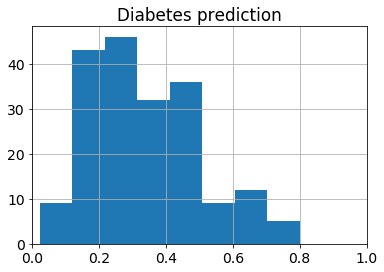

In [142]:
#store the probability of 1 in a separate array
plt.rcParams['font.size']=14
y_predict_proba=lr.predict_proba(X_test)[:,1]
plt.hist(y_predict_proba,bins=8)
plt.xlim(0,1)
plt.title('Diabetes prediction')
plt.grid(True)

In [135]:
# the percentages of positive outputs
y_predict_proba[:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

### ROC Curve

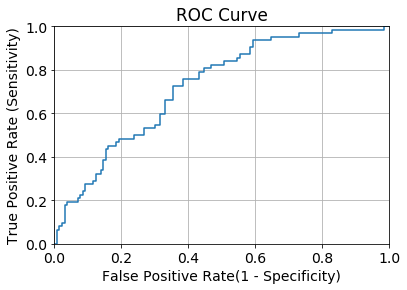

In [147]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict_proba)
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.title('ROC Curve');

In [148]:
metrics.roc_auc_score(y_test,y_predict_proba)

0.7245657568238213